In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

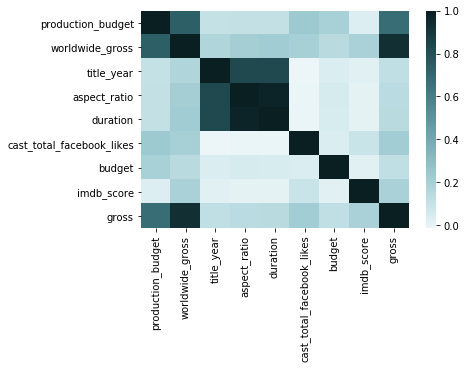

In [2]:
x = pd.read_csv('./data/x.csv')
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)
cmap = sns.cubehelix_palette(start=2.5, rot=0, dark=0.1, light=.95, as_cmap=True)
sns.heatmap(x.corr(), cmap=cmap) # matriz de correlacion

<div class='alert alert-info'>
La regresion lasso es <b>interpretable</b>:
<li>Mientras mas grande el coeficiente de un feature, mas relevante es para la regresion.</li>
<li>La regresion lasso trata de seleccionar un pequeño numero de features relevante.</li>
</div>

Cargamos los datos:

In [3]:
x = pd.read_csv('./data/x.csv')
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis=1)

Creamos el modelo.

In [4]:
from sklearn.linear_model import Lasso

model = Lasso()

Separamos datos de entrenamiento y datos de test:

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [6]:
len(x_train)/len(x) # porcentaje de datos de entrenamiento

0.75

Entrenamos el modelo:

In [7]:
model.fit(x_train, y_train)

/home/ruben/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Verificamos la calidad del modelo:

In [8]:
model.score(x_test, y_test)

0.896101617355417

Veamos los parametros de la regresion lineal.
(Los atributos de los estimadores terminan con un '_')

In [9]:
model.coef_

array([ 9.13613332e-01, -9.68075665e-01,  1.04572304e+00,  9.62293201e-01,
       -2.47322211e+02,  2.27030443e-03,  5.35064609e+06,  2.04481206e+00])

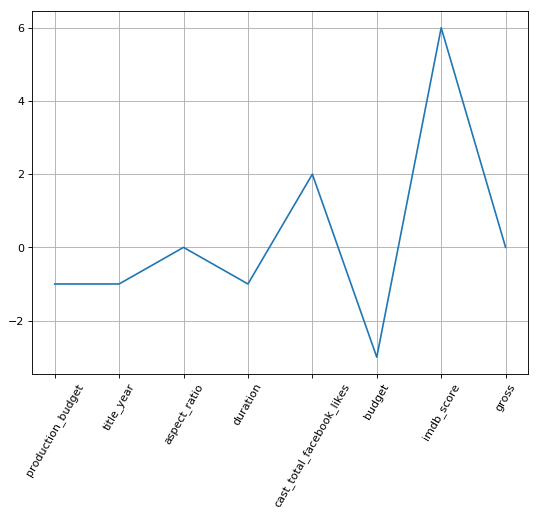

In [10]:
plt.figure(figsize=(8, 6), dpi=80)
var = np.floor(np.log10(np.abs(model.coef_))) # obtengamos los ordenes de magnitud.
plt.plot(var)
plt.grid(True)
plt.xticks(np.arange(8), list(x.columns), rotation=60);

## Correlacion entre variables.

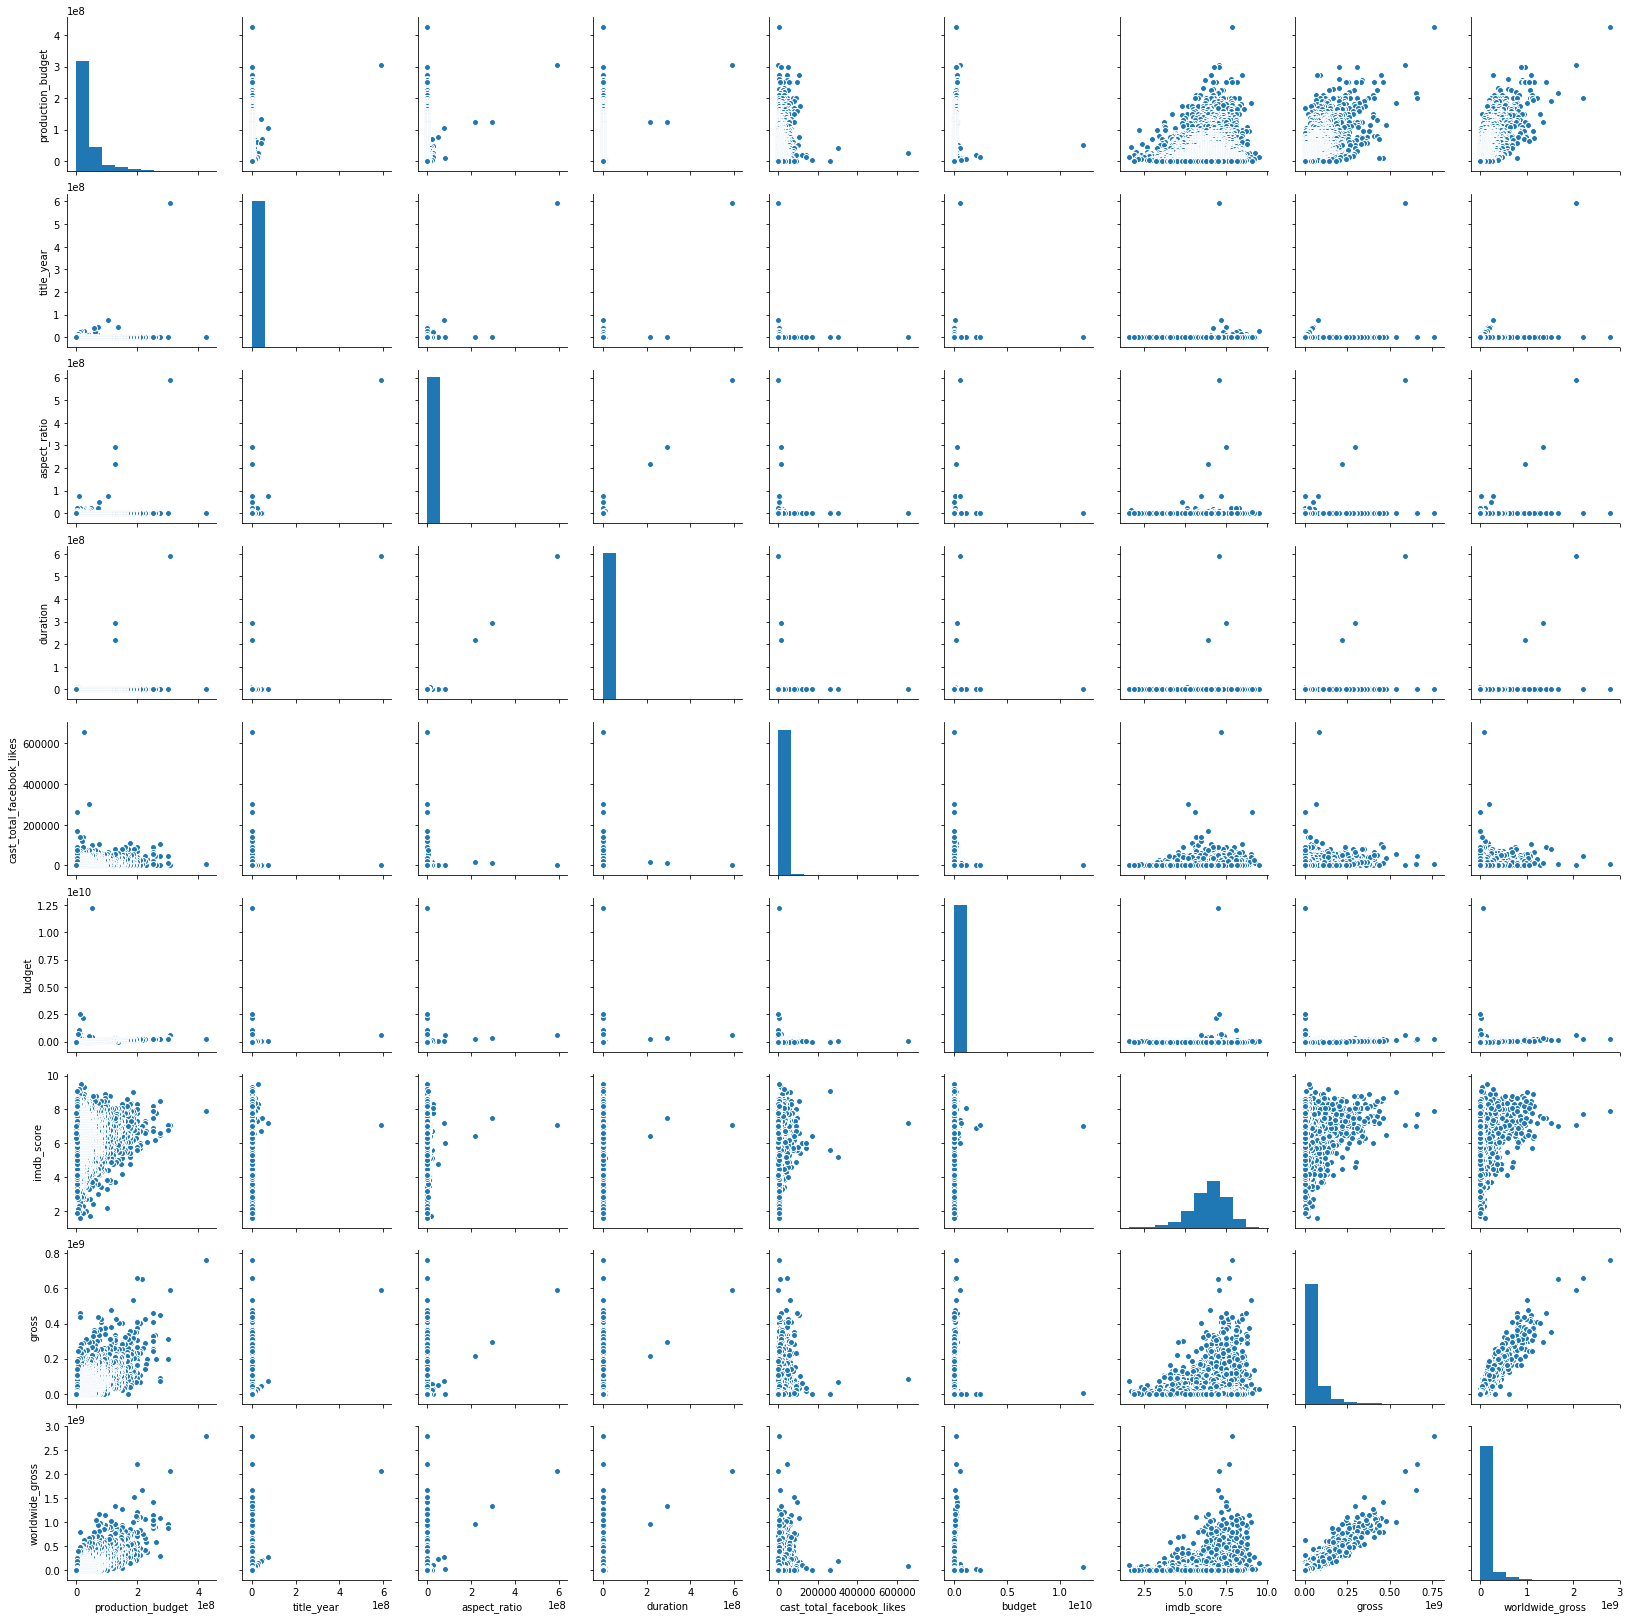

In [11]:
z = pd.concat([x,y], axis=1)
sns.pairplot(z)


Ordenemos nuestros datos por contenedores. separamos los datos en 9 clases, luego con '.cat.codes' hacemos que cada dato este no en un intervalo, sino en una clase nuemrada entre 0 y 8. Lo asignamos a una variable y lo concatenamos con x.

In [19]:
clase = pd.cut(x['production_budget'], 9).cat.codes.rename('class')
z2 = pd.concat([x, clase], axis=1)

Entre mas alto el valor de la clase, mas alto es el costo de la pelicula.

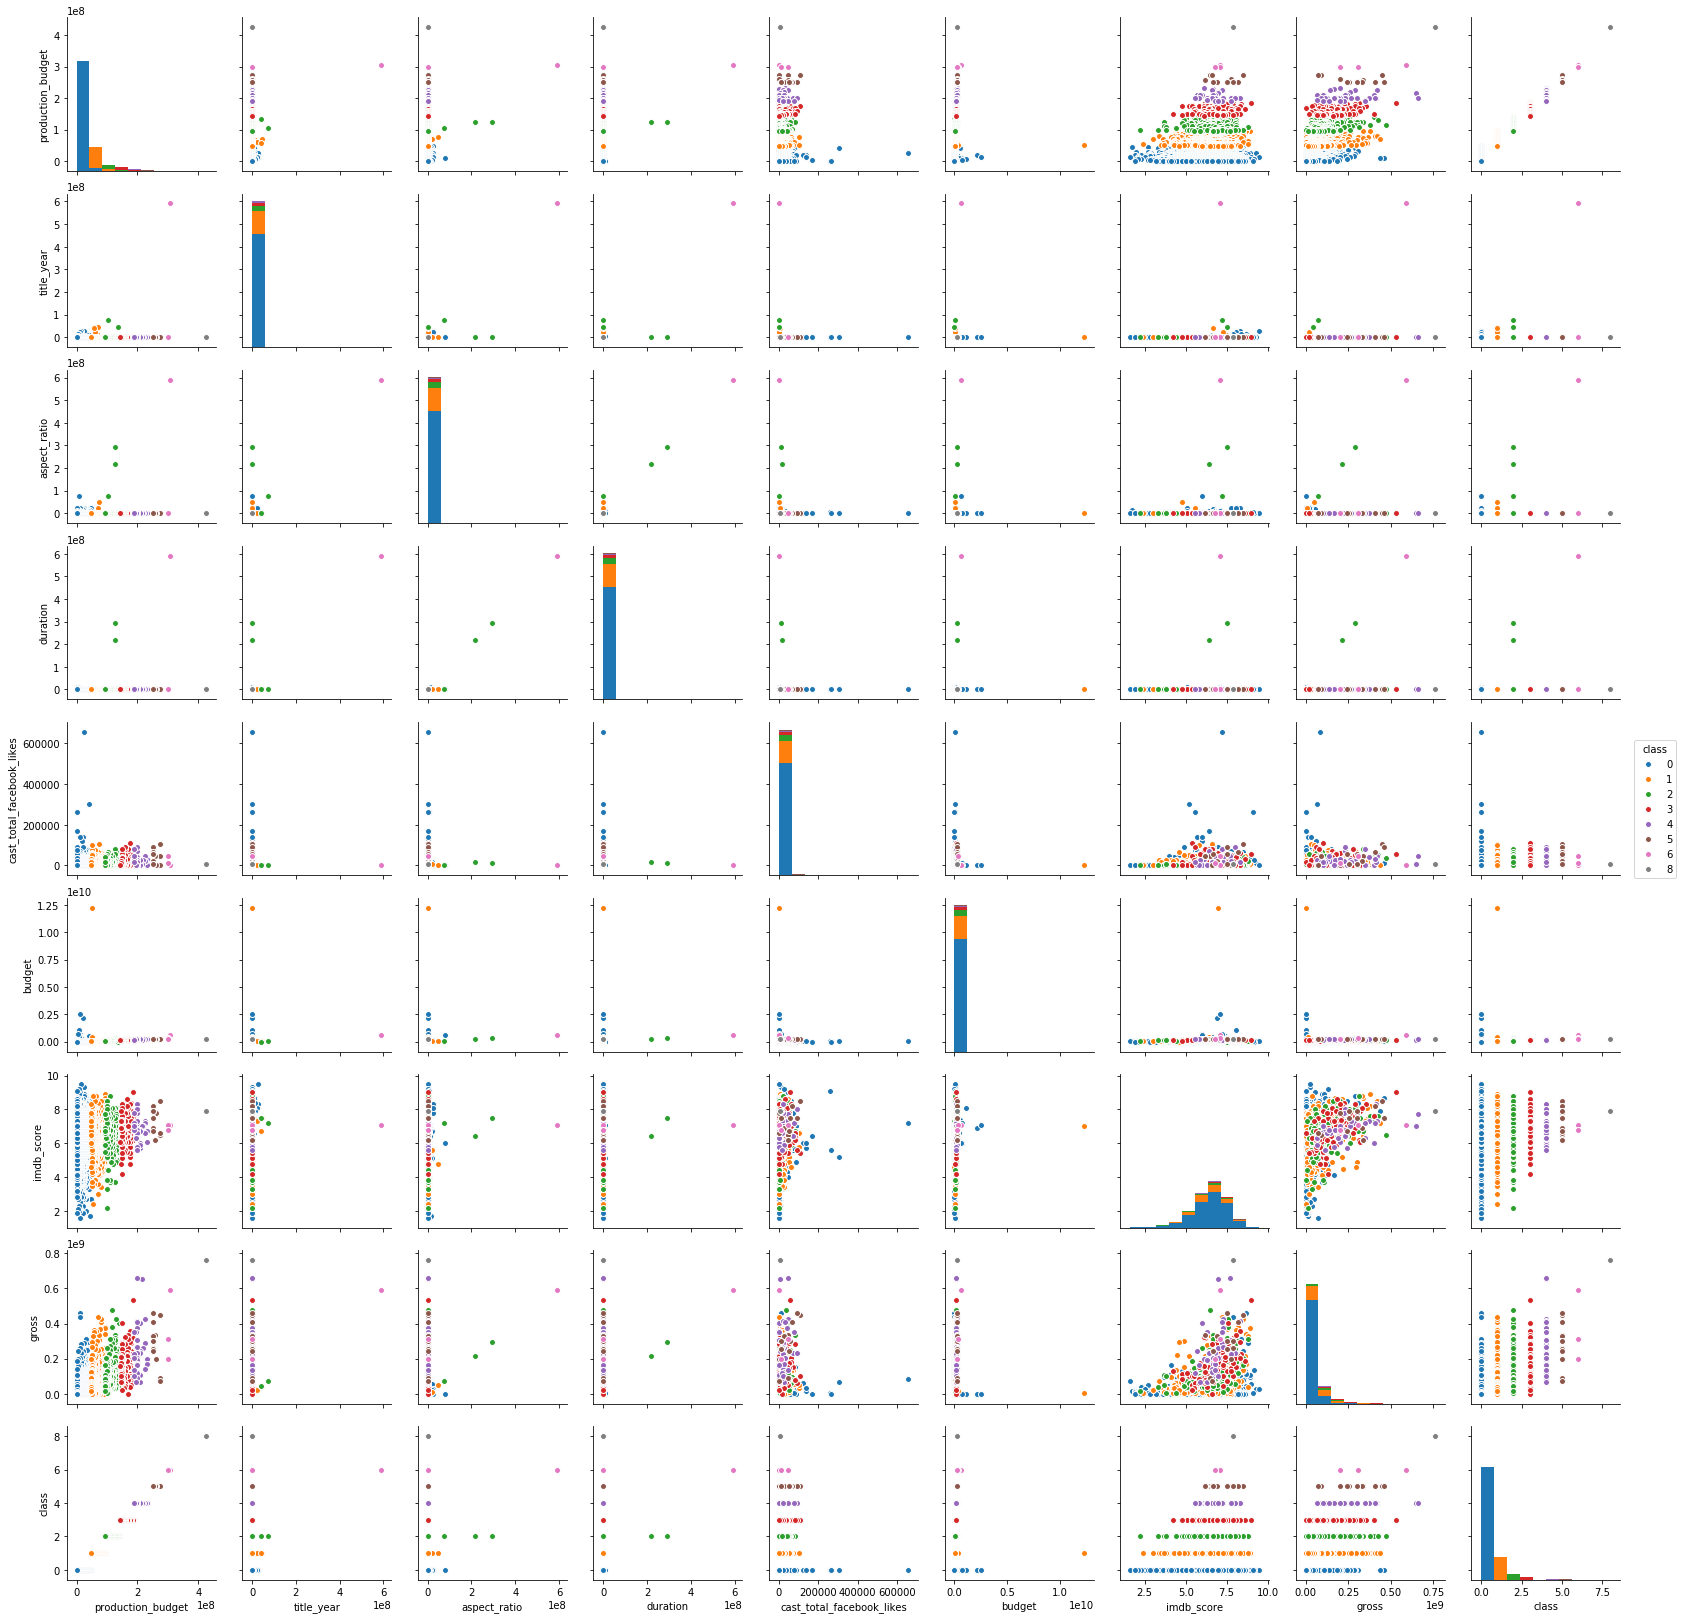

In [21]:
sns.pairplot(z2, hue='class')